Vamos a simular una caminata aleatoria en 1D (una línea donde nos podemos mover con pasos de una 1 unidad en los DOS sentidos). Por practicidad supondremos que hay muchísimos enanos pequeñitos dentro del ordenador echando carreras y pasando rápidamente los datos a la pantalla.

In [13]:
# IMPORTS 
import numpy as np
import matplotlib.pyplot as plt
import random

# CONSTANTES
N, C = 10_000 , 100

La función caminata recibe una lista de posiciones iniciales de entrada (la lista tendrá longitud m para m caminantes) y un número de pasos aleatorios a dar, N. Esta función ejecuta en un bucle un paso a cada iteración, y añade a la lista de trayetorias la posición actual de cada caminante. Por defecto simularemos 10 caminantes con 10_000 pasos por caminante.

In [14]:
def caminata(pis,N):
    trayectorias = [pis]
    for iter in range(N):
        pis = [ c + random.choice([-1,1]) for c in pis ]
        trayectorias.append(pis)
    return trayectorias

In [15]:
# inicializamos posiciones iniciales 
pos_ini = np.zeros(C)

# llamamos a la función y almacenamos las trayectorias de los caminantes para sus paseos
trayectorias  = caminata(pos_ini,N)

Vamos a ver el paseo dado por los enanitos que están corriendo dentro del ordenador... pintamos en un color difente cada caminante gracias a la asignación de color por defecto pyplot.ploy

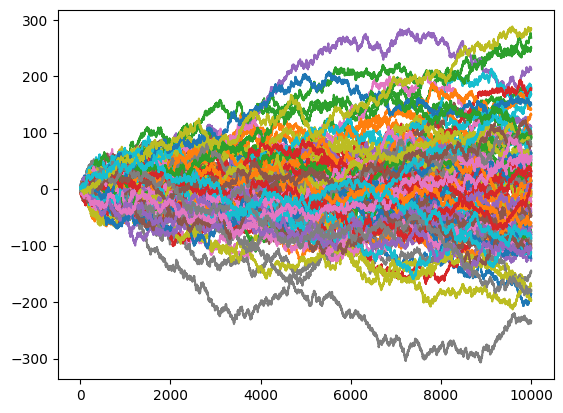

In [16]:
for idx_c in range(C):
    plt.plot([tt[idx_c] for tt in trayectorias])
plt.show()

Ahora vamos a estudiar de todas las trayectorias almacenadas las veces que algún enanito pasa por cada una de las posiciones atravesadas en la simulación. 

In [17]:
# rec será una lista de posiciones individuales
rec = []
for tt in trayectorias:
    for e in tt:
        rec.append(e) 

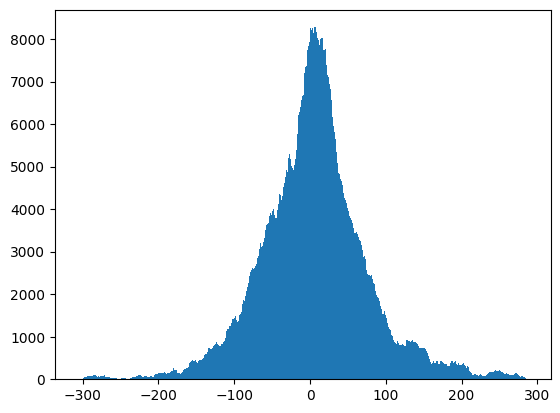

In [18]:
# borramos el plot anterior
import matplotlib.pyplot as plt
# ploteamos el histograma para las posiciones recorridas
plt.hist(rec, bins=len(set(rec)))
plt.show()

Datos estadísticos finales del experimento:

In [19]:
std = np.std(rec)
mean = np.mean(rec)
print(f'Std_dev: {std} , mean: {mean}')

Std_dev: 71.46603999969503 , mean: 5.631150884911509


AHORA LO MISMO pero en 2d

In [20]:
def caminata2d(pis,N):
    trayectorias2d = []
    for i in range(N):
        rr  = random.choice([0,1])
        pis = [[ c[i] + random.choice([-1,1]) if i == rr else c[i] for i in range(2) ] for c in pis]
        trayectorias2d.append(pis)
    return trayectorias2d

In [21]:
pos_ini_2d = [[0,0] for _ in range(C)]
t2d = caminata2d(pos_ini_2d, N)

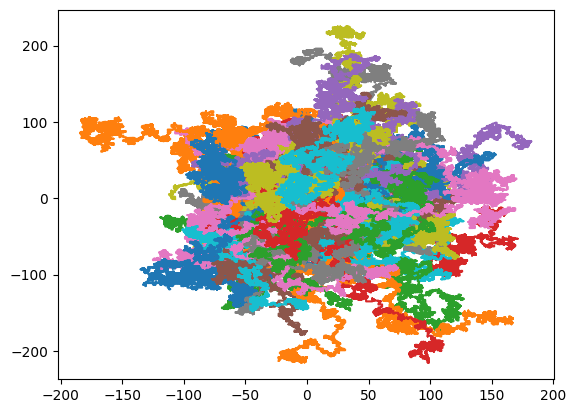

In [22]:
for idx_c in range(len(pos_ini_2d)):
    x = [e[idx_c][0] for e in t2d]
    y = [e[idx_c][1] for e in t2d]
    plt.plot(x,y)
plt.show()

In [23]:
recorridos = []
for tt in t2d:
    for t in tt:
        recorridos.append([t[0],t[1]])

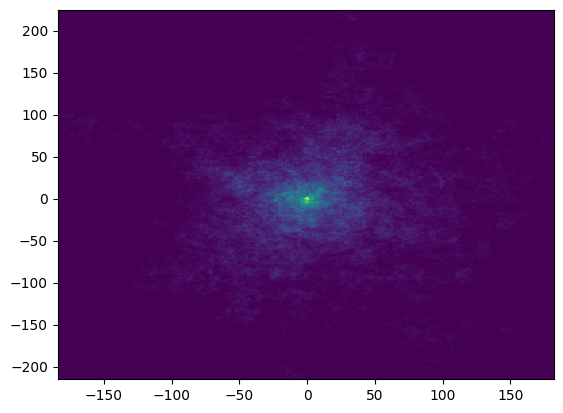

In [24]:
import matplotlib.pyplot as plt
x = [r[0] for r in recorridos]
y = [r[1] for r in recorridos]
plt.hist2d(x,y,bins=(len(set(x)),len(set(y))))
plt.show()